# The Bias-Variance Trade-off: A Practical Demonstration with Scikit-learn Data
The **bias-variance trade-off** is a central concept in machine learning that helps us understand and manage the errors in our predictive models. It is a fundamental challenge in model building, as it forces us to choose between a simpler model that might underfit the data (high bias) and a more complex model that might overfit the data (high variance).

## Why Understanding Bias and Variance is Crucial
The primary goal of any machine learning model is **generalization**: to perform well on unseen data. The total error of a model can be decomposed into three components:
1. **Bias Error**: Error due to overly simplistic assumptions in the learning algorithm. A high-bias model consistently misses the relevant relations between features and target outputs (underfitting).
2. **Variance Error**: Error due to the model being too sensitive to small fluctuations in the training data. A high-variance model performs well on training data but poorly on new data (overfitting).
3. **Irreducible Error**: Error that cannot be reduced by any model, as it is inherent noise in the data itself.

Understanding this trade-off is essential for:
* **Model Selection**: Choosing the right complexity for a given problem.
* **Hyperparameter Tuning**: Adjusting parameters (like the degree of a polynomial or the regularization strength) to find the sweet spot between bias and variance.
* **Diagnosing Performance**: Determining if poor performance is due to underfitting (fix by increasing complexity) or overfitting (fix by increasing data or regularization).

## Key Concepts
| Concept | Description | Typical Model State | Solution Direction |
| :--- | :--- | :--- | :--- |
| **High Bias** | Model is too simple; consistently under-predicts or over-predicts. | **Underfitting** | Increase model complexity (e.g., add features, use a more complex algorithm). |
| **High Variance** | Model is too complex; fits the noise in the training data. | **Overfitting** | Decrease model complexity (e.g., regularization, feature selection, more data). |
| **Sweet Spot** | Optimal balance where both bias and variance are minimized. | **Good Generalization** | Found through cross-validation and hyperparameter tuning. |


Training samples: 14448
Test samples: 6192


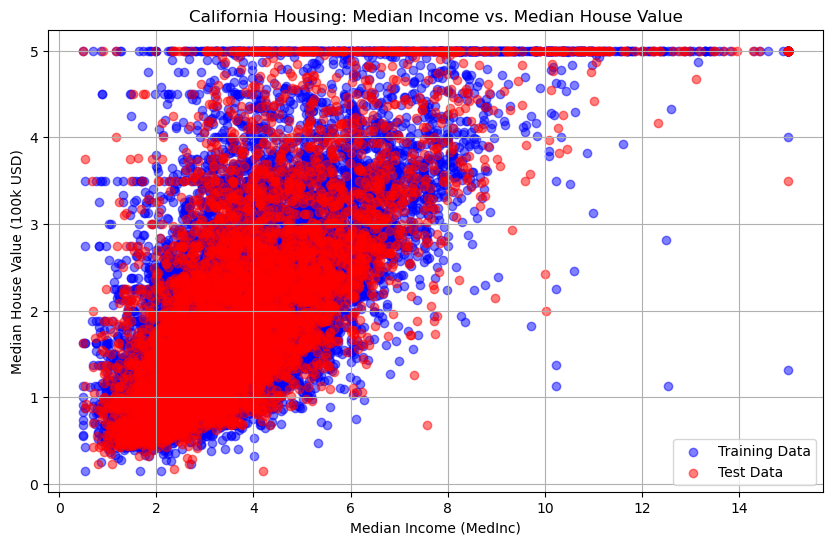

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd

# 1. Load the California Housing Dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# For clear visualization of polynomial fit, we will use only one feature: Median Income (MedInc)
X = df[['MedInc']].values
y = df['MedHouseVal'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Test Data')
plt.title('California Housing: Median Income vs. Median House Value')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value (100k USD)')
plt.legend()
plt.grid(True)
plt.show()

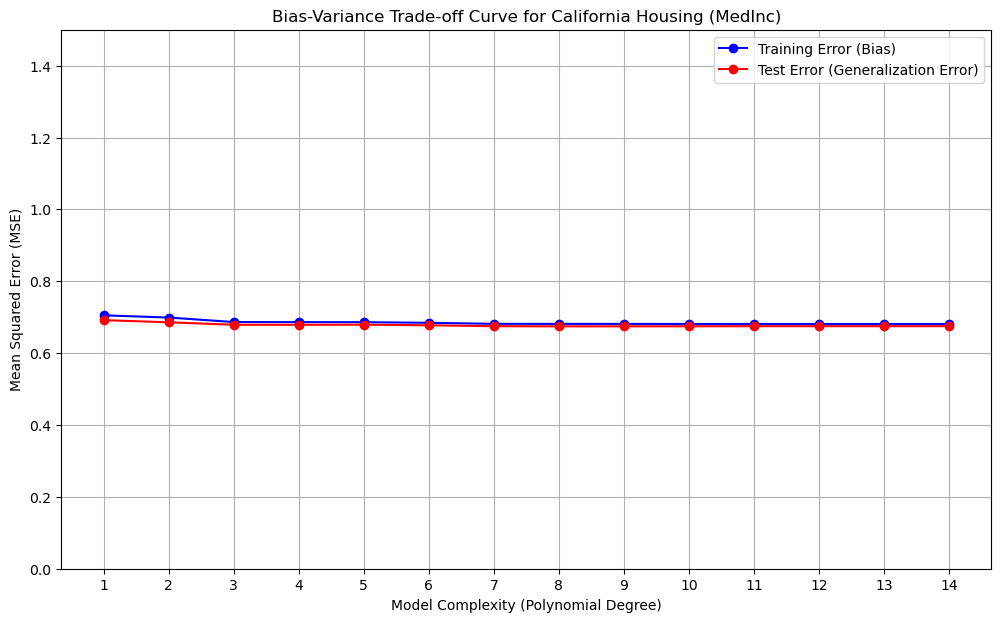

Interpretation:
 - Low Complexity (High Bias/Underfitting): The Test Error is high and close to the Training Error.
 - Optimal Complexity (Sweet Spot): The Test Error reaches its minimum.
 - High Complexity (High Variance/Overfitting): The Training Error continues to drop, but the Test Error starts to increase significantly, indicating the model is fitting noise.


In [3]:
# 2. Visualizing the Bias-Variance Trade-off Curve
# We will train polynomial regression models of increasing complexity (degree) and track their error.
degrees = np.arange(1, 15)
train_errors = []
test_errors = []

for degree in degrees:
    # Use a pipeline to scale the data and then apply polynomial regression
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(12, 7))
plt.plot(degrees, train_errors, label='Training Error (Bias)', marker='o', color='blue')
plt.plot(degrees, test_errors, label='Test Error (Generalization Error)', marker='o', color='red')
plt.title('Bias-Variance Trade-off Curve for California Housing (MedInc)')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.xticks(degrees)
plt.ylim(0, 1.5) # Limit y-axis for better visualization of the trade-off
plt.show()

print("Interpretation:")
print(" - Low Complexity (High Bias/Underfitting): The Test Error is high and close to the Training Error.")
print(" - Optimal Complexity (Sweet Spot): The Test Error reaches its minimum.")
print(" - High Complexity (High Variance/Overfitting): The Training Error continues to drop, but the Test Error starts to increase significantly, indicating the model is fitting noise.")

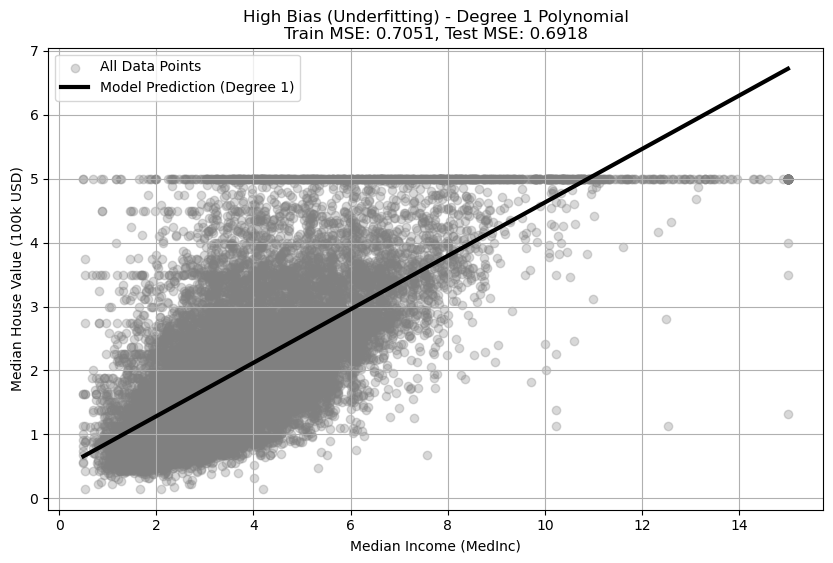

Observation: The simple linear model (Degree 1) is too rigid (high bias) and cannot capture the curvature in the data, leading to high error on both sets.


In [4]:
# 3. High Bias Example (Degree 1 - Simple Linear Model)
degree = 1
model_bias = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
model_bias.fit(X_train, y_train)

train_mse = mean_squared_error(y_train, model_bias.predict(X_train))
test_mse = mean_squared_error(y_test, model_bias.predict(X_test))

X_plot = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_plot = model_bias.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.3, label='All Data Points')
plt.plot(X_plot, y_plot, color='black', linewidth=3, label=f'Model Prediction (Degree {degree})')
plt.title(f'High Bias (Underfitting) - Degree {degree} Polynomial\nTrain MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value (100k USD)')
plt.legend()
plt.grid(True)
plt.show()

print("Observation: The simple linear model (Degree 1) is too rigid (high bias) and cannot capture the curvature in the data, leading to high error on both sets.")

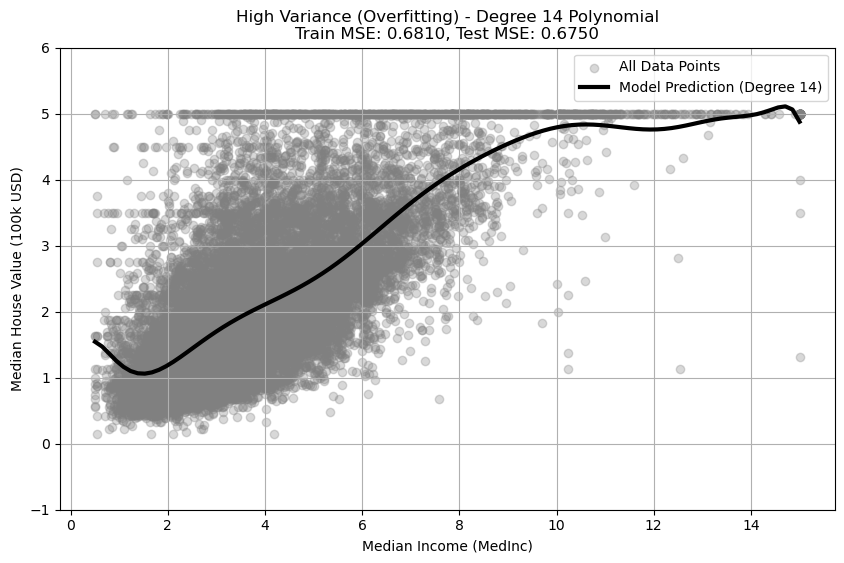

Observation: The highly complex model (Degree 14) fits the training data noise perfectly (low Train MSE) but exhibits extreme, erratic behavior outside the training points, leading to a much higher Test MSE.


In [5]:
# 4. High Variance Example (Degree 14 - Overly Complex Model)
degree = 14
model_variance = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
model_variance.fit(X_train, y_train)

train_mse = mean_squared_error(y_train, model_variance.predict(X_train))
test_mse = mean_squared_error(y_test, model_variance.predict(X_test))

X_plot = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_plot = model_variance.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.3, label='All Data Points')
plt.plot(X_plot, y_plot, color='black', linewidth=3, label=f'Model Prediction (Degree {degree})')
plt.title(f'High Variance (Overfitting) - Degree {degree} Polynomial\nTrain MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value (100k USD)')
plt.ylim(-1, 6) # Set y-limit to show the extreme fluctuations
plt.legend()
plt.grid(True)
plt.show()

print("Observation: The highly complex model (Degree 14) fits the training data noise perfectly (low Train MSE) but exhibits extreme, erratic behavior outside the training points, leading to a much higher Test MSE.")

## Conclusion
The demonstration using the California Housing dataset clearly illustrates the **Bias-Variance Trade-off**. As model complexity increases, the bias decreases (the model fits the training data better), but the variance increases (the model becomes too sensitive to the training data's noise). The goal of a machine learning practitioner is to find the model complexity that minimizes the **Test Error** (Generalization Error), which is the point where the two error components are optimally balanced.